In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from branchynet.net import BranchyNet
from branchynet.links import *
import chainer.functions as F
import chainer.links as L
from branchynet import utils, visualize
from chainer import cuda

Define Network

In [3]:
from networks import lenet_mnist

branchyNet = lenet_mnist.get_network()
branchyNet.to_gpu()
branchyNet.training()

Import Data

In [4]:
from datasets import mnist
x_train, y_train, x_test, y_test = mnist.get_data()

Settings

In [5]:
TRAIN_BATCHSIZE = 512
TEST_BATCHSIZE = 1
TRAIN_NUM_EPOCHS = 50

Train Main Network

In [6]:
main_loss, main_acc, main_time = utils.train(branchyNet, x_train, y_train, main=True, batchsize=TRAIN_BATCHSIZE,
                                             num_epoch=TRAIN_NUM_EPOCHS)

Train BranchyNet

In [7]:
TRAIN_NUM_EPOCHS = 100
branch_loss, branch_acc, branch_time = utils.train(branchyNet, x_train, y_train, batchsize=TRAIN_BATCHSIZE,
                                                   num_epoch=TRAIN_NUM_EPOCHS)

#set network to inference mode
branchyNet.testing()

Visualizing Network Training

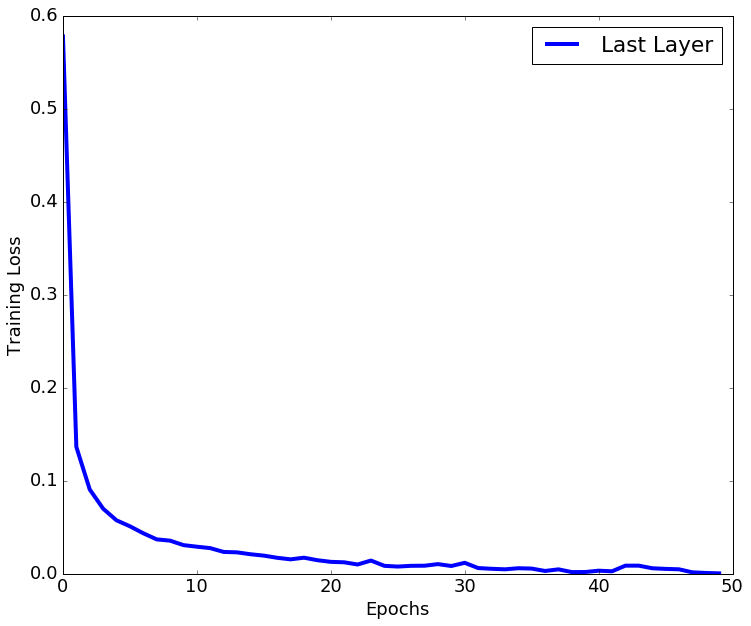

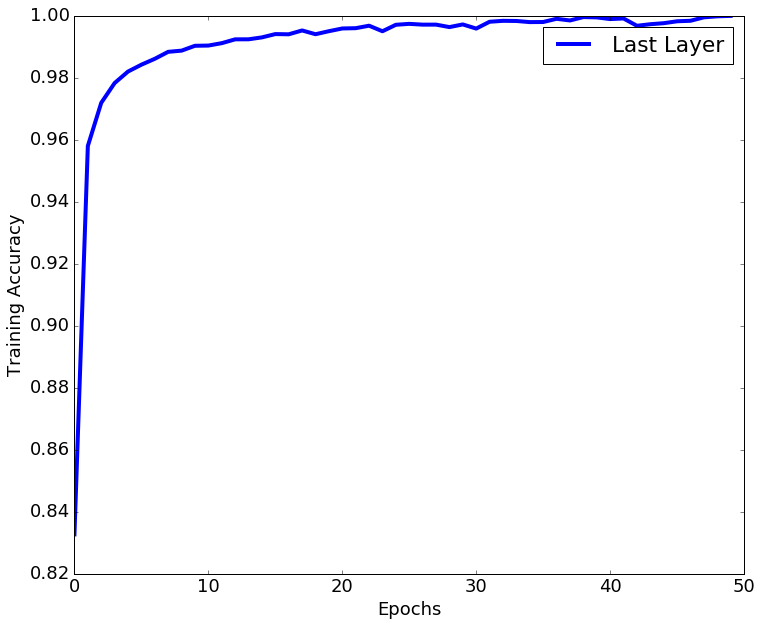

In [8]:
visualize.plot_layers(main_loss, xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(main_acc, xlabel='Epochs', ylabel='Training Accuracy')

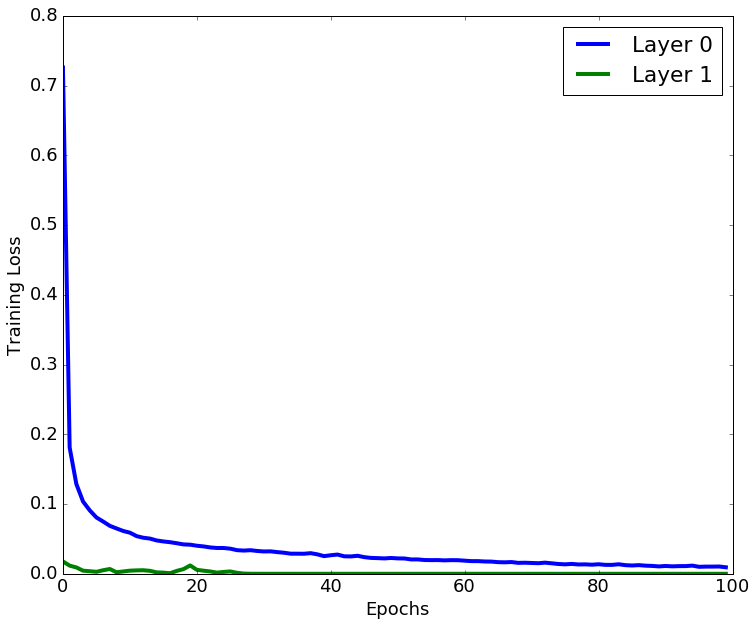

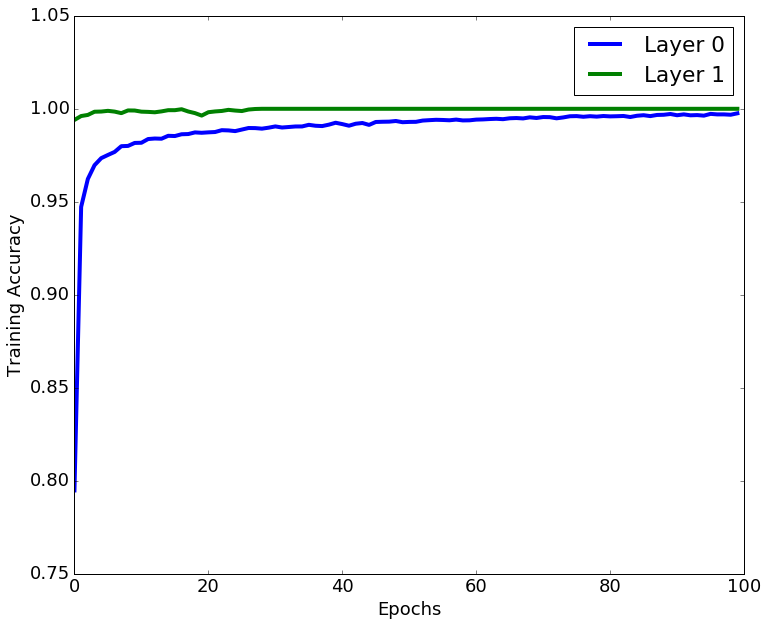

In [9]:
visualize.plot_layers(zip(*branch_loss), xlabel='Epochs', ylabel='Training Loss')
visualize.plot_layers(zip(*branch_acc), xlabel='Epochs', ylabel='Training Accuracy')

In [ ]:
import dill
branchyNet.to_cpu()
with open("_models/lenet_mnist.bn", "wb") as f:
    dill.dump(branchyNet, f)

Get exit result, compute openmax vs softmax

In [ ]:
import scipy as sp

branchyNet.testing()
branchyNet.to_cpu()

# size = 100

from openmax.openmax import OpenMax, get_openmax_scores, plot_openmax_mean

for i, model in enumerate(branchyNet.models):
    features_train = sp.expand_dims(model.test(x_train[:size]).data,1)
    features_test = sp.expand_dims(model.test(x_test[:size]).data,1)
    
    openmax = OpenMax(tailsize=20, distance_type="eucos", alpharank=5)
    openmax.fit(features_train,y_train[:size])

    openmax_vs_train, softmax_vs_train = get_openmax_scores(features_train, openmax)
    openmax_vs_test, softmax_vs_test = get_openmax_scores(features_test, openmax)
    
    plot_openmax_mean(openmax_vs_train, softmax_vs_train, title='Exit {} Train'.format(i))
    plot_openmax_mean(openmax_vs_test, softmax_vs_test, title='Exit {} Test'.format(i))